1- **Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?**

Ans: Accurate prediction of health insurance costs is crucial in the current healthcare and insurance landscape. It can help insurers offer personalized healthcare plans, reduce costs, improve the quality of care, and enhance customer experiences.

2- **If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?**

Ans: There are a few potential gaps in knowledge that may arise in predicting health insurance costs using machine learning techniques. For example, the dataset used for training the model may not be representative of the broader population, or there may be missing or inaccurate data in the dataset that can affect the accuracy of the predictions.
 

3-  **Please aim to identify patterns in the data and important features that may impact an ML model.**

Ans: This has been taken care in the project.
 

4- **Please perform multiple machine learning models, perform all required steps to check if there are any assumptions, and justify your model. Why is your model better than any other possible model? Please explain it by relevant cost functions and, if possible, by any graph.**

Ans: We have used the accuracy model using R2 to find the best model among the most common four models. For Cost function we have used RMSE to find which model is best performing

**Data Analysis approach:**

What approach are you going to take to prove or disprove your hypothesis?

Ans: We have mostly used the Plots to verify the approach along with the correlation matrix

What feature engineering techniques will be relevant to your project?


*   Encoding categorical variables
*   Handling missing values
*   Removing outliers
*   Feature selection


Please justify your data analysis approach.

Ans: We have performed the EDA to find the relationship between variable and find the null values and outliers along with the Feature selection and model selection using the R2 score and the model which perform best was selected.


Identify essential patterns in your data using the EDA approach to justify your findings.

Ans: This has been done in the project

Machine learning approach

**What method will you use for machine learning-based predictions of health insurance price?**
Regression model or Decision tree model can be used for predicting the price

**Please justify the most appropriate model.**

Random forest Regressor model performs the best with most accuracy and least RMSE.


**Please perform the necessary steps required to improve the accuracy of your model.**

This has been taken care in the project.

**Please compare all models (at least four models).**

This has been taken care in the project

Loading the Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [75]:
import warnings
warnings.filterwarnings('ignore')

Loading the datasets

In [22]:
df = pd.read_excel('Health_insurance_cost.xlsx')
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [23]:
df.shape

(1338, 7)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


There are 1,338 insurance records with 7 variables.
The data set contains null values in age and gender columns along with null values in health insurance price column
There are categorical and numerical data types.

In [16]:
df.age.unique()

array([19., 18., 28., 33., 32., 31., 46., 37., 60., 25., 62., 23., 56.,
       27., 52., 30., 34., 59., nan, 55., 22., 63., 26., 35., 24., 41.,
       38., 36., 21., 48., 40., 58., 53., 43., 64., 20., 61., 44., 57.,
       29., 45., 54., 49., 47., 51., 42., 50., 39.])

In [17]:
df.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [19]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

Updating the Null values with mean values

In [25]:
age_mean = df['age'].mean().round()

In [26]:
BMI_mean = df['BMI'].mean()

In [27]:
df['age'].fillna(value = age_mean, inplace = True)

In [28]:
df['BMI'].fillna(value = BMI_mean, inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1338 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1338 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [33]:
df[df['health_insurance_price'].isnull()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1281,47.0,female,27.645,2,yes,northwest,NaN
1312,34.0,male,42.900,1,no,southwest,NaN


In [ ]:
dropping the values where health insurance price is null as this will not be helpfull in training the dataset

In [36]:
df.dropna(inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1336 non-null   float64
 1   gender                  1336 non-null   object 
 2   BMI                     1336 non-null   float64
 3   Children                1336 non-null   int64  
 4   smoking_status          1336 non-null   object 
 5   location                1336 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.5+ KB


This dataset contains 1336 data points with 6 independent features and 1 target feature.

In [ ]:
From the above, we can see that the dataset contains 3 columns with float values 3 with categorical values and 1 contains integer values.

In [38]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.160928,30.631279,1.094311,13268.527719
std,13.915486,6.052198,1.206138,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4744.325050
50%,39.000000,30.495000,1.000000,9382.033000
75%,51.000000,34.430000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


Observations:

*   The average age is 39 years.
*   The average body mass index is 30.63.
*   The average number of children is 1.
*   The average claims charge was $13,268.

# Visualization

Visualize the relationship between age and claim charges.

Text(0, 0.5, 'Claim Charges ($)')

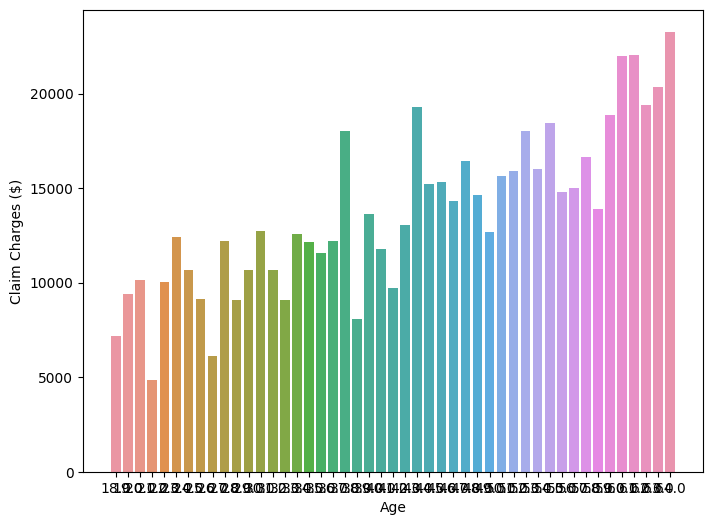

In [48]:
fig = plt.figure(figsize = (8, 6))
sns.barplot(y = 'health_insurance_price', 
            x = 'age', 
            data = df,
            errorbar = None)
plt.plot()
# set labels
plt.xlabel("Age", size=10)
plt.ylabel("Claim Charges ($)", size=10)

Summary: As the age increases claim charges increases

Visualize the relationship between gender and claim charges.

Text(0, 0.5, 'Claim Charges ($)')

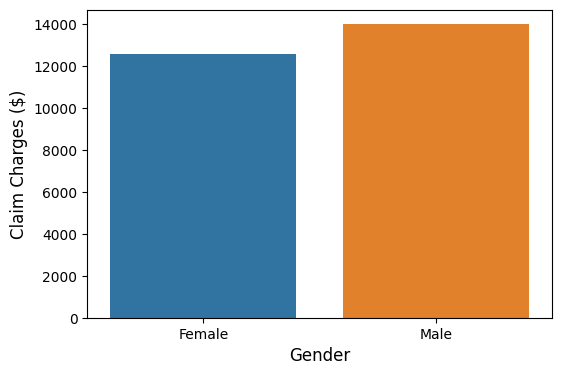

In [49]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'health_insurance_price', 
            x = 'gender', 
            data = df,
            errorbar = None)
plt.xticks(ticks=[0, 1], labels = ["Female", "Male"])

# set labels
plt.xlabel("Gender", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Summary: Charges are on the higher side for males as compared to females but the difference is not that much.

Visualize the relationship between No. of child and claim charges.

Text(0, 0.5, 'Claim Charges ($)')

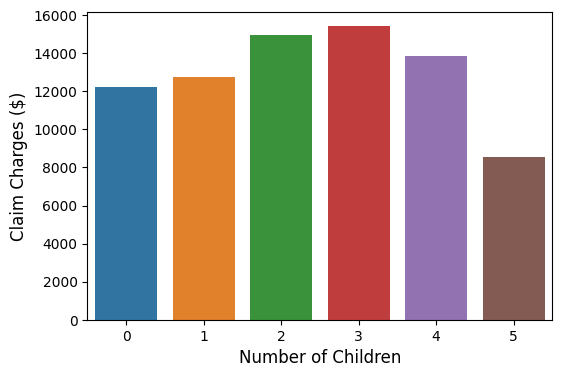

In [69]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'health_insurance_price', 
            x = 'Children', 
            data = df,
            errorbar = None)

# set labels
plt.xlabel("Number of Children", size=12)
plt.ylabel("Claim Charges ($)", size=12)

Summary: Charges are most for person having 2 or 3 child but there is no significant impact

Visualize the relationship between Smoking status and claim charges.

Text(0, 0.5, 'Claim Charges ($)')

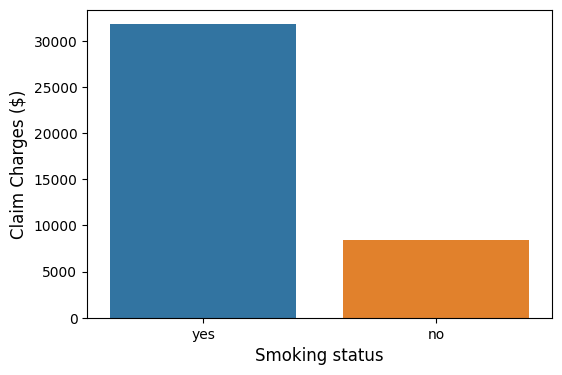

In [72]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'health_insurance_price', 
            x = 'smoking_status', 
            data = df,
            errorbar = None)

# set labels
plt.xlabel("Smoking status", size=12)
plt.ylabel("Claim Charges ($)", size=12)

In [ ]:
Visualize the relationship between location and claim charges.

Text(0, 0.5, 'Claim Charges ($)')

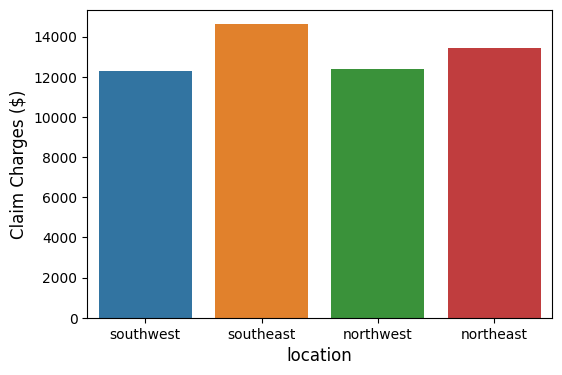

In [73]:
fig = plt.figure(figsize = (6,4))
sns.barplot(y = 'health_insurance_price', 
            x = 'location', 
            data = df,
            errorbar = None)

# set labels
plt.xlabel("location", size=12)
plt.ylabel("Claim Charges ($)", size=12)

There is no significant impact of location on claim charges

There is a significant impact on claim charges for the person who smokes. Almost there is 3 times more charges for smokers then non smokers

<ipython-input-57-9354928a6392>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


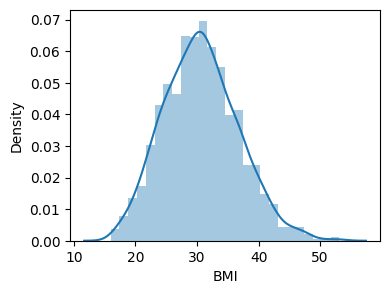

In [57]:
fig = plt.figure(figsize = (4, 3))
sns.distplot(
            df['BMI'])
plt.show()

<ipython-input-58-3df37c33d64e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


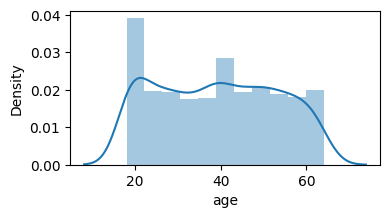

In [58]:
fig = plt.figure(figsize = (4, 2))
sns.distplot(
            df['age'])
plt.show()

Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

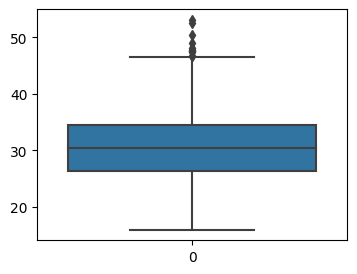

In [59]:
fig = plt.figure(figsize = (4, 3))
sns.boxplot(
            df['BMI'])
plt.show()

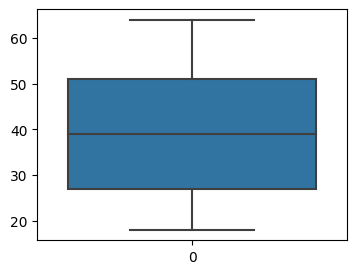

In [60]:
fig = plt.figure(figsize = (4, 3))
sns.boxplot(
            df['age'])
plt.show()

From the above two diagrams we can see that there are outliers in the BMI column of the given dataset.

To check how many datasets are impacting the BMI

In [64]:
df.shape, df[df['BMI']<45].shape

((1336, 7), (1316, 7))

Around 20 values lies in outliers and removing these 20 values will not impact the overall data

In [66]:
df = df[df['BMI']<45]


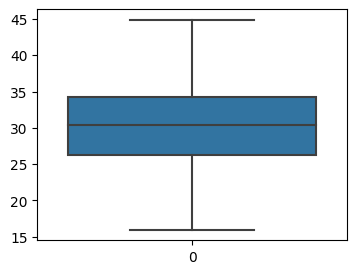

In [67]:
fig = plt.figure(figsize = (4, 3))
sns.boxplot(
            df['BMI'])
plt.show()

Encoding for categorical data

In [76]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])       
df["smoking_status"] = le.fit_transform(df["smoking_status"]) 
df["location"] = le.fit_transform(df["location"]) 

Creating a heatmap to find the correlation between features and label

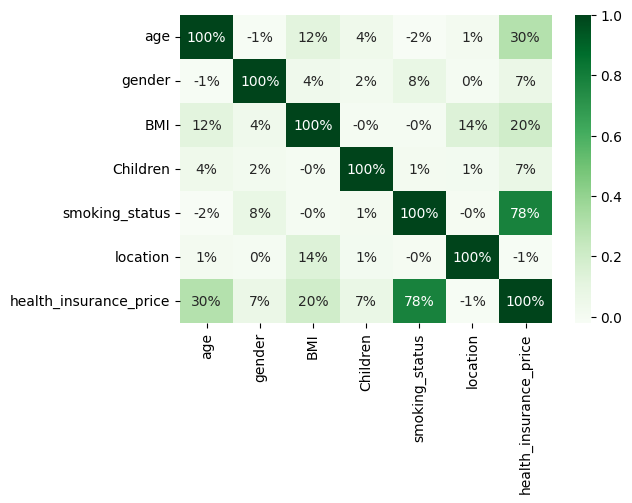

In [84]:
plt.figure(figsize=(6,4))  
sns.heatmap(df.corr(), annot=True, fmt='.0%', cmap='Greens')
plt.show()

Observations:

* There is a strong correlation between smokers and charges.
* There is a weak correlation between age and charges
* There is a weak correlation between BMI and charges.

Dropping the columns which will not impact the models much

In [85]:
df.drop(['gender', 'location'], axis=1, inplace=True)

**Splitting the data into Training and Testing sets**

In [86]:
x_var = df.drop('health_insurance_price', axis = 1)
y_var = df['health_insurance_price']

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size = 0.25, random_state=42)

In [89]:
x_train.shape, x_test.shape

((987, 4), (329, 4))

Normalizing the data to make distribution have mean value = 0 and SD = 1

In [88]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Training the different models to find out which is the best model to find the correct price. We will be using R2 and RMSE to find the performance.

Linear Regression Model

In [90]:
lr_mod = LinearRegression()
lr_mod.fit(x_train,y_train)
lr_predict = lr_mod.predict(x_test)

Calculating R2 score and RMSE for Linear Regression Model

In [94]:
from sklearn.metrics import r2_score, mean_squared_error

In [93]:
r2_lr = r2_score(y_test, lr_predict)
print("R2 score :", r2_lr)

R2 score : 0.7157858114477331


In [101]:
rmse_lr = mean_squared_error(y_test, lr_predict, squared = False)
print("RMSE for LR :", rmse_lr)

RMSE for LR : 6414.9453597014335


**Random Forest Model**

In [102]:
rf_mod = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_mod.fit(x_train,y_train)
rf_predict = rf_mod.predict(x_test)

In [103]:
r2_rf = r2_score(y_test, rf_predict)
print("R2 score :", r2_rf)

R2 score : 0.7795547875129248


In [104]:
rmse_rf = mean_squared_error(y_test, rf_predict, squared = False)
print("RMSE for LR :", rmse_rf)

RMSE for LR : 5649.635378269415


Support Vector Machine model

In [106]:
sv_mod = SVR()
sv_mod.fit(x_train,y_train)
sv_predict = sv_mod.predict(x_test)

In [107]:
r2_sv = r2_score(y_test, sv_predict)
print("R2 score :", r2_sv)

R2 score : -0.1314383892293094


In [108]:
rmse_sv = mean_squared_error(y_test, sv_predict, squared = False)
print("RMSE for LR :", rmse_sv)

RMSE for LR : 12799.279976471309


Ridge Regressor Model

In [112]:
rr_mod = Ridge()
rr_mod.fit(x_train,y_train)
rr_predict = rr_mod.predict(x_test)

In [113]:
r2_rr = r2_score(y_test, rr_predict)
print("R2 score :", r2_rr)

R2 score : 0.7157758278128414


In [114]:
rmse_rr = mean_squared_error(y_test, rr_predict, squared = False)
print("RMSE for LR :", rmse_rr)

RMSE for LR : 6415.058028091128


,Model,Accuracy_score
1,Random Forrest,0.779555
0,Linear Regression,0.715786
3,Ridge,0.715776
2,Support Vector Machine,-0.131438


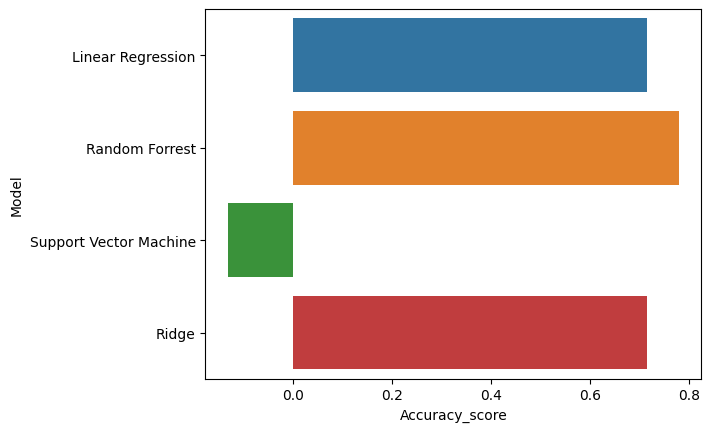

In [115]:
models = pd.DataFrame({
    'Model':['Linear Regression', 'Random Forrest', 'Support Vector Machine', 'Ridge'],
    'Accuracy_score' :[r2_lr, r2_rf, r2_sv, r2_rr]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

Accuracy of Random Forest is Maximum. Hence we can conclude that to predict future prices, RandomForest ML model can be used